![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [180]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [16]:
print(bikes.groupby('workingday').total.describe())

             count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0


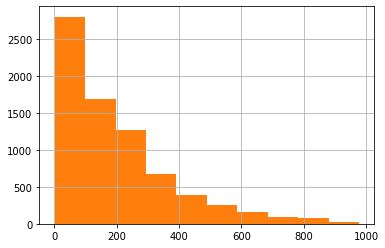

In [17]:
bikes.groupby('workingday').total.hist()
plt.show()

[]

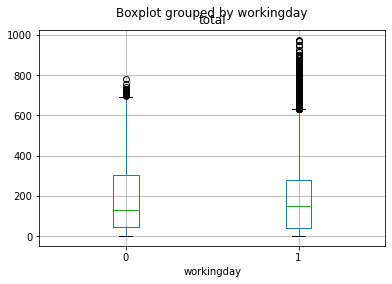

In [22]:
boxplot = bikes.boxplot(column=['total'],by="workingday")
boxplot.plot()

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [18]:
print(bikes.groupby('hour').total.describe())

      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.674725  127.444294  10.0  123.00  183.0  265.50

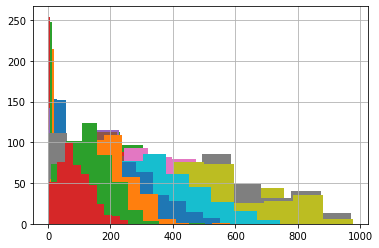

In [19]:
bikes.groupby('hour').total.hist()
plt.show()

[]

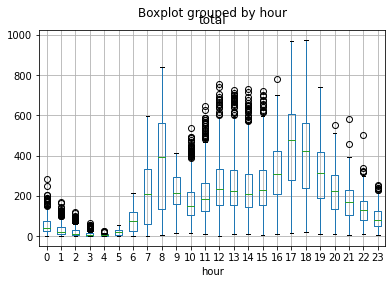

In [23]:
boxplot = bikes.boxplot(column=['total'],by="hour")
boxplot.plot()

### CONCLUSIONES
- Se observa que los días que son trabajables en la semana workingday=1, se tiene una mayor cantidad de bicicletas rentadas, que la cantidad que se presenta durante los fines de semana y días festivos.
- A nivel de horas se observa que entre las 17 y 18 se presenta la mayor cantidad de bicicletas rentadas, con respecto a las otras horas del día.
- Las horas de la madrugada entre la 1am y 5am son las horas en las que menor cantidad de bicicletas se rentan durante el día 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

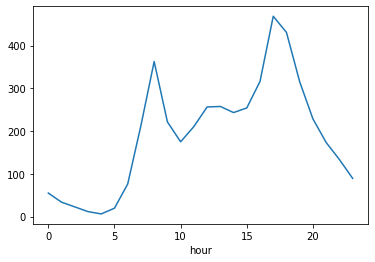

In [12]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

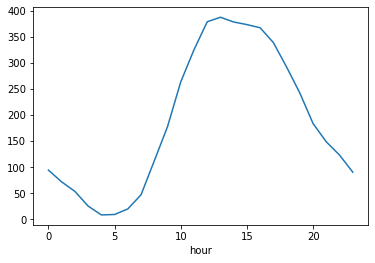

In [34]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos
bikes.query("workingday == 0").groupby('hour').total.mean().plot()

### HALLAZGOS WORKINGDAY=0

Se observa que para días festivos o fines de semana, la principal cantidad de bicicletas rentadas se presenta desde las 10am, y mantiene su tendencia hasta las 10pm. Las horas de mayor cantidad de bicicletas rentadas se presenta entre las 12pm y las 17.

<AxesSubplot:xlabel='hour'>

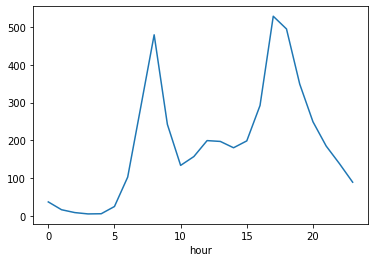

In [35]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes.query("workingday == 1").groupby('hour').total.mean().plot()

### HALLAZGOS WORKINGDAY=1

Se observa que para días laborales, se presentan dos picos en cantidad de bicicletas rentadas, uno en la mañana y otro en la tarde, siendo el de la tarde en el que se presenta la mayor cantidad de biciletas rentadas. En la mañana el mayor pico se da hacia las 8am, mientras que en la tarde el mayor pico de bicicletas rentadas se presenta entre las 17 y 18.

<AxesSubplot:xlabel='workingday,hour'>

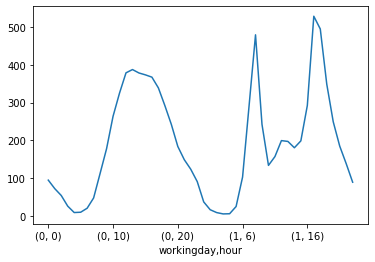

In [36]:
bikes.groupby(['workingday','hour']).total.mean().plot()

In [234]:
print(bikes.groupby(['workingday','hour']).total.describe())

                 count        mean         std   min     25%    50%     75%  \
workingday hour                                                               
0          0     145.0   94.489655   47.152842  16.0   53.00   96.0  124.00   
           1     145.0   71.910345   34.487098  12.0   44.00   73.0   95.00   
           2     143.0   53.748252   25.194027   7.0   36.00   56.0   73.00   
           3     144.0   25.534722   13.406456   2.0   15.00   26.0   33.00   
           4     145.0    8.544828    5.089449   1.0    5.00    8.0   12.00   
           5     142.0    9.373239    7.526416   1.0    5.00    8.0   12.00   
           6     145.0   19.993103   18.214195   1.0    7.00   16.0   27.00   
           7     145.0   47.268966   43.639663   1.0   23.00   40.0   63.00   
           8     145.0  112.255172   82.662196   8.0   62.00   98.0  140.00   
           9     145.0  177.924138   89.909065  14.0  102.00  179.0  237.00   
           10    145.0  263.806897  119.686587  22.0

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [112]:
# Celda 3 - Implementación Regresión Lineal
#Se separa X y Y
XTotal=bikes[['workingday','hour']]
yTotal=bikes.loc[:,bikes.columns=='total']
#Se queda con variables numericas
XTotal=XTotal[XTotal.describe().columns]
#
XTotal

,workingday,hour
datetime,,
2011-01-01 00:00:00,0,0
2011-01-01 01:00:00,0,1
2011-01-01 02:00:00,0,2
2011-01-01 03:00:00,0,3
2011-01-01 04:00:00,0,4
...,...,...
2012-12-19 19:00:00,1,19
2012-12-19 20:00:00,1,20
2012-12-19 21:00:00,1,21


In [133]:
# Se prepara y dividen los datos disponibles con el 67% para entrenamiento y 33% para prueba.
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)


In [43]:
# Se crea el objeto de regresión lineal
reg = linear_model.LinearRegression()

In [129]:
# Se entrena el modelo utilizando los datos de entrenamiento
reg.fit(XTrain, yTrain)

LinearRegression()

In [46]:
print('Coefficientes: ', reg.coef_)

Coefficientes:  [[ 6.770441   10.55099422]]


### Interpretación de Coeficientes

Los coeficientes obtenidos indican que por el cambio entre día feriado, fin de semana a día laboral, se puede esperar que la cantidad de bicicletas rentadas se incremente en un promedio de 6.77.

Mientras que por cada cambio de hora se puede esperar que la cantidad de bicicletas rentadas se incremente en un promedio de 10.55.

In [49]:
print('Varianza: {}'.format(reg.score(XTest, yTest)))

Varianza: 0.15357074523449832


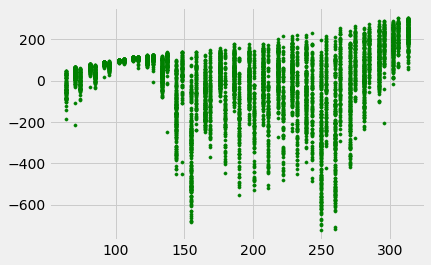

In [50]:
#Obtener los errores residuales en los datos de entrenamiento
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(XTrain), reg.predict(XTrain) - yTrain,
            color = "green", s = 10, label = 'Train data')

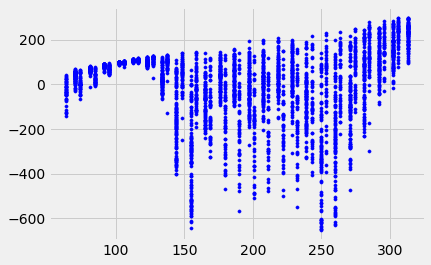

In [51]:
#Obtener los errores residuales en los datos de prueba
plt.scatter(reg.predict(XTest), reg.predict(XTest) - yTest,
            color = "blue", s = 10, label = 'Test data')

In [130]:
ypred = reg.predict(XTest)

In [136]:
# Calculating RMSE and R2 Score
mse = mean_squared_error(yTest, ypred)
rmse = np.sqrt(mse)
r2_score = reg.score(XTotal, yTotal)

print("rmse : ", rmse)
print("r2 : ", r2_score)

rmse :  166.3052482486937
r2 :  0.1604536219879903


### Limitaciones de la Regresión Líneal 

La regresión líneal en este caso es limitada dado que simplifica el problema al asumir una relación lineal entre las variables en evaluación.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [69]:
#Celda 4 - Albol de decisión Manual
bikes_var = bikes.loc[:,['workingday','hour','total']]
bikes_var


,workingday,hour,total
datetime,,,
2011-01-01 00:00:00,0,0,16
2011-01-01 01:00:00,0,1,40
2011-01-01 02:00:00,0,2,32
2011-01-01 03:00:00,0,3,13
2011-01-01 04:00:00,0,4,1
...,...,...,...
2012-12-19 19:00:00,1,19,336
2012-12-19 20:00:00,1,20,241
2012-12-19 21:00:00,1,21,168


In [79]:
XTot = bikes.loc[:,['workingday','hour']]
yTot = bikes.loc[:,['total']]

In [238]:
# Función de cálculo de la entropia
def entropy(y):
    
    if isinstance(y, pd.Series):
        a = y.value_counts()/y.shape[0]
        entropy = np.sum(-a*np.log2(a+1e-9))
        return(entropy)

    else:
        raise('Object must be a Pandas Series.')
  # Función de calculo de la varianza
def variance(y):
  
  if(len(y) == 1):
    return 0
  else:
    return y.var()

# Función de calculo de la ganacia

def information_gain(y, mask, func=entropy):
  
    a = sum(mask)
    b = mask.shape[0] - a
  
    if(a == 0 or b ==0): 
        ig = 0
  
    else:
        if y.dtypes != 'O':
            ig = variance(y) - (a/(a+b)* variance(y[mask])) - (b/(a+b)*variance(y[-mask]))
        else:
            ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
  
    return ig


In [241]:
#Creación de combinaciones
def categorical_options(a): 

    a = a.unique()

    opciones = []
    for L in range(0, len(a)+1):
        for subset in itertools.combinations(a, L):
            subset = list(subset)
            opciones.append(subset)

    return opciones[1:-1]

#Función que retorna el mejor split, el error y tipo de variable basado en una función de costo seleccionada

def max_information_gain_split(x, y, func=entropy):
  
    split_value = []
    ig = [] 

    numeric_variable = True if x.dtypes != 'O' else False
 
    if numeric_variable:
        options = x.sort_values().unique()[1:]
    else: 
        options = categorical_options(x)

  # Calculo de la ganancia
    for val in options:
        mask =   x < val if numeric_variable else x.isin(val)
        val_ig = information_gain(y, mask, func)
        ig.append(val_ig)
        split_value.append(val)
  
    if len(ig) == 0:
        return(None,None,None, False)

    else:
  # Obtención de los resultados con mayor ganancia
        best_ig = max(ig)
        best_ig_index = ig.index(best_ig)
        best_split = split_value[best_ig_index]
        return(best_ig,best_split,numeric_variable, True)


In [243]:
#Función para Obtener Mejor Split, retorna la variable, valor, tipo de variable y ganancia

def get_best_split(y, data):
  
    masks = data.drop(y, axis= 1).apply(max_information_gain_split, y = data[y])
    if sum(masks.loc[3,:]) == 0:
        return(None, None, None, None)

    else:
        masks = masks.loc[:,masks.loc[3,:]]

    # Obtener resultados para el split con mayor ganancia
    split_variable = max(masks)
    split_value = masks[split_variable][1] 
    split_ig = masks[split_variable][0]
    split_numeric = masks[split_variable][2]

    return(split_value, split_value, split_ig)

# Función para generar el split

def make_split(variable, value, data, is_numeric):
  
    if is_numeric:
        data_1 = data[data[variable] < value]
        data_2 = data[(data[variable] < value) == False]
    else:
        data_1 = data[data[variable].isin(value)]
        data_2 = data[(data[variable].isin(value)) == False]

    return(data_1,data_2)

#Función para realizar las predicciones

def make_prediction(data, target_factor):
 
    if target_factor:
        pred = data.value_counts().idxmax()
    else:
        pred = data.mean()

    return pred

In [246]:
#Función que permite entrenar el arbol de decisión

def train_tree(data,y, target_factor, max_depth = None,min_samples_split = None, min_information_gain = 1e-20, counter=0, max_categories = 20):

  if counter==0:
    types = data.dtypes
    check_columns = types[types == "object"].index
    for column in check_columns:
      var_length = len(data[column].value_counts()) 
      if var_length > max_categories:
        raise ValueError('The variable ' + column + ' has '+ str(var_length) + ' unique values, which is more than the accepted ones: ' +  str(max_categories))

  if max_depth == None:
    depth_cond = True

  else:
    if counter < max_depth:
      depth_cond = True

    else:
      depth_cond = False

 
  if min_samples_split == None:
    sample_cond = True

  else:
    if data.shape[0] > min_samples_split:
      sample_cond = True

    else:
      sample_cond = False

  
  if depth_cond & sample_cond:

    var,val,ig,var_type = get_best_split(y, data)

 
    if ig is not None and ig >= min_information_gain:

      counter += 1

      left,right = make_split(var, val, data,var_type)

      split_type = "<=" if var_type else "in"
      question =   "{} {}  {}".format(var,split_type,val)
      subtree = {question: []}

      yes_answer = train_tree(left,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

      no_answer = train_tree(right,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

      if yes_answer == no_answer:
        subtree = yes_answer

      else:
        subtree[question].append(yes_answer)
        subtree[question].append(no_answer)

    else:
      pred = make_prediction(data[y],target_factor)
      return pred


  else:
    pred = make_prediction(data[y],target_factor)
    return pred

  return subtree


In [247]:
max_depth = 6
min_samples_split = 20
min_information_gain  = 1e-5
Res=train_tree(bikes_var,'total',True,max_depth,min_samples_split,min_information_gain)

ValueError: not enough values to unpack (expected 4, got 3)

In [75]:
Res

{'workingday <=  1': [{'hour <=  9': [{'hour <=  8': [{'hour <=  3': [{'hour <=  1': [39,
          {'hour <=  2': [93, 74]}]},
        {'hour <=  7': [{'hour <=  4': [28, 5]}, 71]}]},
      119]},
    {'hour <=  20': [{'hour <=  11': [{'hour <=  10': [81, 264]},
        {'hour <=  18': [{'hour <=  12': [367, 420]},
          {'hour <=  19': [181, 80]}]}]},
      {'hour <=  22': [{'hour <=  21': [193, 220]},
        {'hour <=  23': [130, 123]}]}]}]},
  {'hour <=  7': [{'hour <=  6': [{'hour <=  1': [31,
        {'hour <=  5': [{'hour <=  2': [11, 5]}, 26]}]},
      112]},
    {'hour <=  21': [{'hour <=  17': [{'hour <=  9': [{'hour <=  8': [308,
            467]},
          {'hour <=  16': [178, 118]}]},
        {'hour <=  19': [{'hour <=  18': [568, 224]},
          {'hour <=  20': [232, 280]}]}]},
      {'hour <=  23': [{'hour <=  22': [218, 107]}, 54]}]}]}]}

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [118]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []


modelo=DecisionTreeRegressor(max_depth=6, random_state=123)

modelo.fit(XTrain, yTrain)



DecisionTreeRegressor(max_depth=6, random_state=123)

Profundidad del árbol: 6
Número de nodos terminales: 34


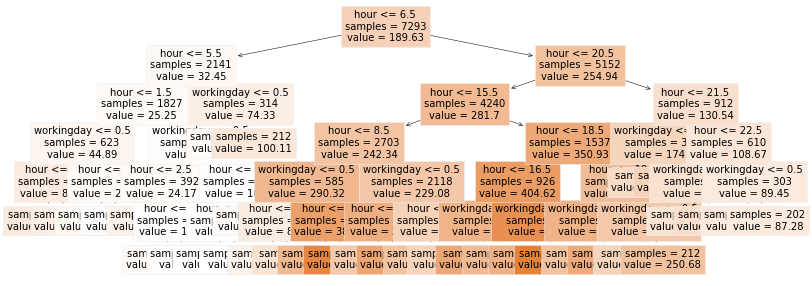

In [119]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = XTotal.columns,
            class_names   = 'total',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [122]:
predicciones = modelo.predict(X = XTest)

rmse = mean_squared_error(
        y_true  = yTest,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 107.87919997163209


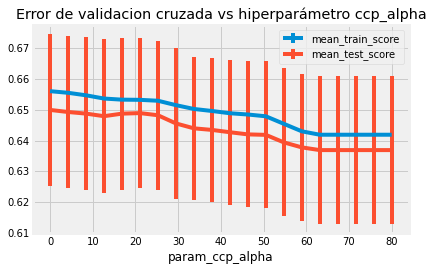

In [125]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(XTrain, yTrain)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

Profundidad del árbol: 10
Número de nodos terminales: 48


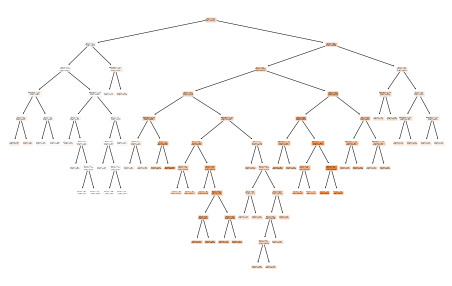

In [127]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = XTotal.columns,
            class_names   = 'total',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [128]:
predicciones = modelo_final.predict(X = XTest)

rmse = mean_squared_error(
        y_true  = yTest,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 106.84813356832721


### Comentarios

Con este modelo se obtienen mejores resultados que con regresión lineal para el error cuadratico medio, especialmente si se hace prunning en el arbol.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [137]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [138]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [139]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [161]:
# Celda 6
RegLog=LogisticRegression(random_state=0,max_iter=10000)
RegLog.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [162]:
predRegLog=RegLog.predict(X_test)
predProbRegLog=RegLog.predict_proba(X_test)

In [205]:
Acc_RL=metrics.accuracy_score(predRegLog,y_test)
F1_RL=metrics.f1_score(predRegLog,y_test)
print('Accuracy Regresión Logística: ', metrics.accuracy_score(predRegLog,y_test))
print('F1 score Regresión Logística: ', metrics.f1_score(predRegLog,y_test))

Accuracy Regresión Logística:  0.626
F1 score Regresión Logística:  0.6139022711631108


In [195]:
DecTree=DecisionTreeClassifier(random_state=123)
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [196]:
predDecTree=DecTree.predict(X_test)


In [206]:
Acc_AD=metrics.accuracy_score(predDecTree,y_test)
F1_AD=metrics.f1_score(predDecTree,y_test)

print('Accuracy Arbol de Decision: ', metrics.accuracy_score(predDecTree,y_test))
print('F1 score Arbol de Decisión: ', metrics.f1_score(predDecTree,y_test))

Accuracy Arbol de Decision:  0.5406666666666666
F1 score Arbol de Decisión:  0.5428002654280026


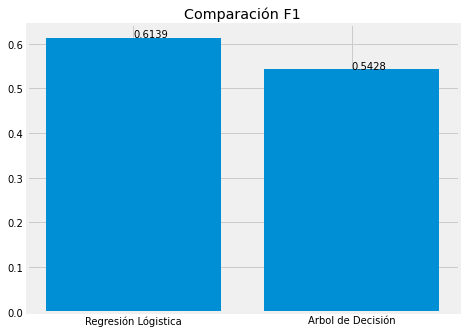

In [207]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación F1")
ejeX = ['Regresión Lógistica','Arbol de Decisión']
ejeY = [round(F1_RL,5),round(F1_AD,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

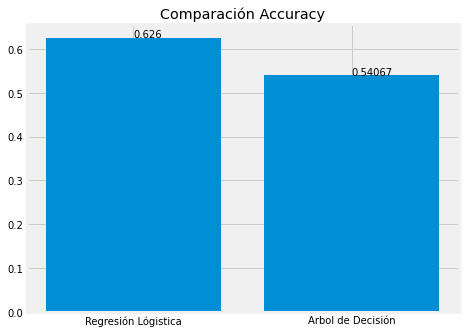

In [208]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy")
ejeX = ['Regresión Lógistica','Arbol de Decisión']
ejeY = [round(Acc_RL,5),round(Acc_AD,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [209]:
# 100 árboles de decisión donde max_depth = None
clf_DT_N=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None),n_estimators=100, max_samples=300, bootstrap=True, random_state=42, n_jobs=-1,oob_score=True)

In [210]:
#Prediccion y desempeño de votación mayoritaria

clf_DT_N.fit(X_train,y_train)
y_pred=clf_DT_N.predict(X_test)
f1_DT_N=metrics.f1_score(y_pred,y_test)
Acc_DT_N=metrics.accuracy_score(y_pred,y_test)
print('F1 score Arbol de Clasificación: ',metrics.f1_score(y_pred,y_test))
print('Accuracy Arbol de Clasificación: ',metrics.accuracy_score(y_pred,y_test))


F1 score Arbol de Clasificación:  0.6567567567567568
Accuracy Arbol de Clasificación:  0.6613333333333333


In [211]:
# 100 árboles de decisión donde max_depth = 2
clf_DT_D=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2),n_estimators=100, max_samples=300, bootstrap=True, random_state=42, n_jobs=-1,oob_score=True)

In [212]:
#Prediccion y desempeño de votación mayoritaria

clf_DT_D.fit(X_train,y_train)
y_pred_D=clf_DT_D.predict(X_test)
f1_DT_D=metrics.f1_score(y_pred_D,y_test)
Acc_DT_D=metrics.accuracy_score(y_pred_D,y_test)
print('F1 score Arbol de Clasificación max depth 2: ',metrics.f1_score(y_pred_D,y_test))
print('Accuracy Arbol de Clasificación max depth 2: ',metrics.accuracy_score(y_pred_D,y_test))

F1 score Arbol de Clasificación max depth 2:  0.631578947368421
Accuracy Arbol de Clasificación max depth 2:  0.6453333333333333


In [213]:
# 100 regresiones logísticas
clf_LR=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100, max_samples=300, bootstrap=True, random_state=42, n_jobs=-1,oob_score=True)

In [214]:
#Prediccion y desempeño de votación mayoritaria

clf_LR.fit(X_train,y_train)
y_pred_LR=clf_LR.predict(X_test)
f1_LR=metrics.f1_score(y_pred_LR,y_test)
Acc_LR=metrics.accuracy_score(y_pred_LR,y_test)
print('F1 score Regresión Logistica: ',metrics.f1_score(y_pred_LR,y_test))
print('Accuracy Regresión Logistica: ',metrics.accuracy_score(y_pred_LR,y_test))

F1 score Regresión Logistica:  0.6138211382113822
Accuracy Regresión Logistica:  0.62


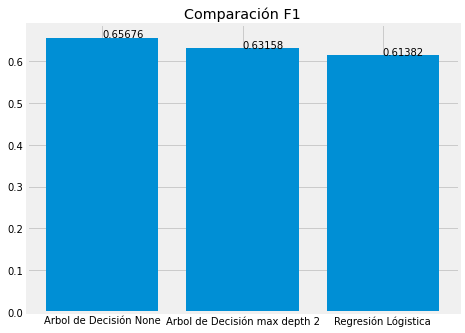

In [215]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación F1 Votación Mayoritaria")
ejeX = ['Arbol de Decisión None','Arbol de Decisión max depth 2','Regresión Lógistica']
ejeY = [round(f1_DT_N,5),round(f1_DT_D,5),round(f1_LR,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

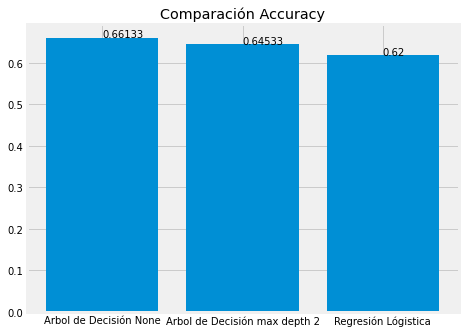

In [216]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy Votación Mayoritaria")
ejeX = ['Arbol de Decisión None','Arbol de Decisión max depth 2','Regresión Lógistica']
ejeY = [round(Acc_DT_N,5),round(Acc_DT_D,5),round(Acc_LR,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [217]:
# Celda 8
# 100 árboles de decisión donde max_depth = None
clf_DTN=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None),n_estimators=100, max_samples=300, bootstrap=True, random_state=42, n_jobs=-1,oob_score=True)

clf_DTN.fit(X_train, y_train)
y_predN = clf_DTN.predict(X_test)
f1_DTN=metrics.f1_score(y_predN,y_test)
Acc_DTN=metrics.accuracy_score(y_predN,y_test)
print('F1 score Arbol de Clasificación: ',metrics.f1_score(y_predN,y_test))
print('Accuracy Arbol de Clasificación: ',metrics.accuracy_score(y_predN,y_test))


F1 score Arbol de Clasificación:  0.6567567567567568
Accuracy Arbol de Clasificación:  0.6613333333333333


In [218]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_DTN.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_DTN.n_estimators))

for i in range(clf_DTN.n_estimators):
    oob_sample = ~clf_DTN.estimators_samples_[i]
    y_pred_ = clf_DTN.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_DTN.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [220]:
# Desempeño al hacer votación ponderada
f1_DTN_P=metrics.f1_score(y_pred,y_test)
Acc_DTN_P=metrics.accuracy_score(y_pred,y_test)
print('F1 score Arbol de Clasificación: ',metrics.f1_score(y_pred,y_test))
print('Accuracy Arbol de Clasificación: ',metrics.accuracy_score(y_pred,y_test))

F1 score Arbol de Clasificación:  0.6631087391594397
Accuracy Arbol de Clasificación:  0.6633333333333333


In [221]:
# 100 árboles de decisión donde max_depth = 2
clf_DTD=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2),n_estimators=100, max_samples=300, bootstrap=True, random_state=42, n_jobs=-1,oob_score=True)

clf_DTD.fit(X_train,y_train)
y_predD=clf_DTD.predict(X_test)
f1_DTD=metrics.f1_score(y_predD,y_test)
Acc_DTD=metrics.accuracy_score(y_predD,y_test)
print('F1 score Arbol de Clasificación max depth 2: ',metrics.f1_score(y_predD,y_test))
print('Accuracy Arbol de Clasificación max depth 2: ',metrics.accuracy_score(y_predD,y_test))

F1 score Arbol de Clasificación max depth 2:  0.631578947368421
Accuracy Arbol de Clasificación max depth 2:  0.6453333333333333


In [222]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_DTD.n_estimators)
y_pred_all_D = np.zeros((X_test.shape[0], clf_DTD.n_estimators))

for i in range(clf_DTD.n_estimators):
    oob_sample = ~clf_DTD.estimators_samples_[i]
    y_pred_D = clf_DTD.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_D[:, i] = clf_DTD.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_D = (np.sum(y_pred_all_D * alpha, axis=1) >= 0.5).astype(np.int)

In [223]:
# Desempeño al hacer votación ponderada
f1_DTD_P=metrics.f1_score(y_pred_D,y_test)
Acc_DTD_P=metrics.accuracy_score(y_pred_D,y_test)
print('F1 score Arbol de Clasificación: ',metrics.f1_score(y_pred_D,y_test))
print('Accuracy Arbol de Clasificación: ',metrics.accuracy_score(y_pred_D,y_test))

F1 score Arbol de Clasificación:  0.6324549237170597
Accuracy Arbol de Clasificación:  0.6466666666666666


In [224]:
# 100 regresiones logísticas
clfLR=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100, max_samples=300, bootstrap=True, random_state=42, n_jobs=-1,oob_score=True)

clfLR.fit(X_train,y_train)
y_predLR=clfLR.predict(X_test)
f1LR=metrics.f1_score(y_predLR,y_test)
AccLR=metrics.accuracy_score(y_predLR,y_test)
print('F1 score Regresión Logistica: ',metrics.f1_score(y_predLR,y_test))
print('Accuracy Regresión Logistica: ',metrics.accuracy_score(y_predLR,y_test))

F1 score Regresión Logistica:  0.6138211382113822
Accuracy Regresión Logistica:  0.62


In [225]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clfLR.n_estimators)
y_pred_all_LR = np.zeros((X_test.shape[0], clfLR.n_estimators))

for i in range(clfLR.n_estimators):
    oob_sample = ~clfLR.estimators_samples_[i]
    y_pred_LR = clfLR.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_LR[:, i] = clfLR.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_LR = (np.sum(y_pred_all_D * alpha, axis=1) >= 0.5).astype(np.int)

In [226]:
# Desempeño al hacer votación ponderada
f1_LR_P=metrics.f1_score(y_pred_LR,y_test)
Acc_LR_P=metrics.accuracy_score(y_pred_LR,y_test)
print('F1 score Regresión Lineal: ',metrics.f1_score(y_pred_LR,y_test))
print('Accuracy Regresión Lineal: ',metrics.accuracy_score(y_pred_LR,y_test))

F1 score Regresión Lineal:  0.6324549237170597
Accuracy Regresión Lineal:  0.6466666666666666


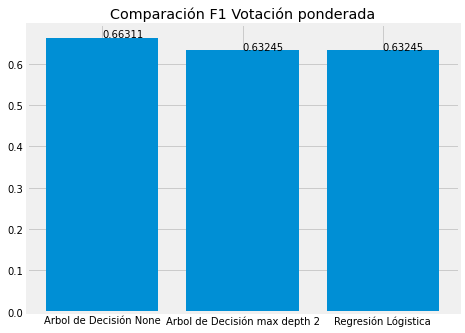

In [228]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación F1 Votación ponderada")
ejeX = ['Arbol de Decisión None','Arbol de Decisión max depth 2','Regresión Lógistica']
ejeY = [round(f1_DTN_P,5),round(f1_DTD_P,5),round(f1_LR_P,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

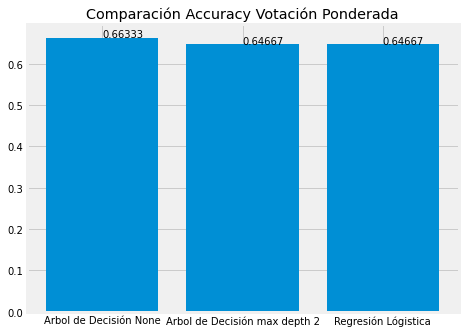

In [229]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy Votación Ponderada")
ejeX = ['Arbol de Decisión None','Arbol de Decisión max depth 2','Regresión Lógistica']
ejeY = [round(Acc_DTN_P,5),round(Acc_DTD_P,5),round(Acc_LR_P,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

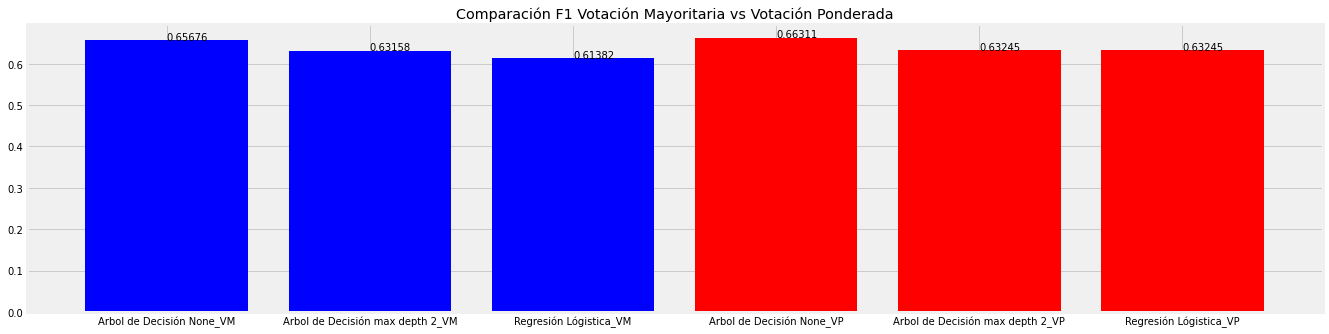

In [232]:
# Celda 9
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.set_title("Comparación F1 Votación Mayoritaria vs Votación Ponderada")
ejeX = ['Arbol de Decisión None_VM','Arbol de Decisión max depth 2_VM','Regresión Lógistica_VM', 'Arbol de Decisión None_VP','Arbol de Decisión max depth 2_VP','Regresión Lógistica_VP']
ejeY = [round(f1_DT_N,5),round(f1_DT_D,5),round(f1_LR,5),round(f1_DTN_P,5),round(f1_DTD_P,5),round(f1_LR_P,5)]
ax.bar(ejeX,ejeY,color=['blue',"blue","blue","red","red","red"])
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

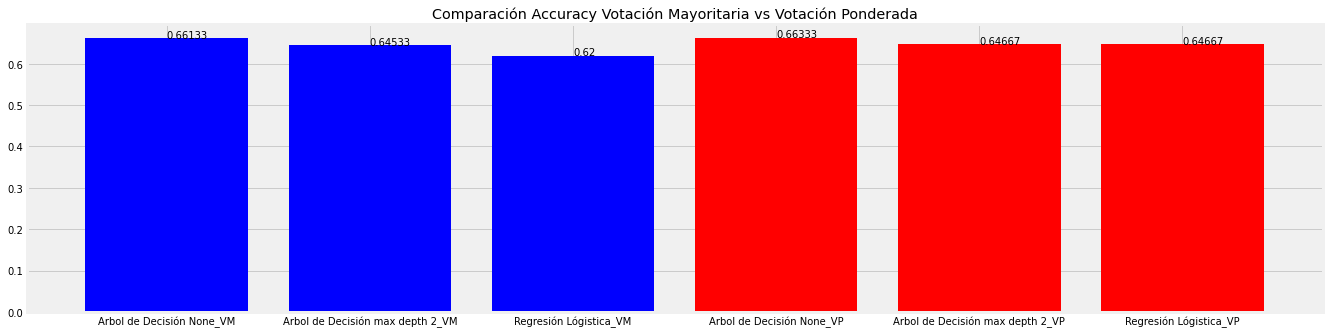

In [233]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.set_title("Comparación Accuracy Votación Mayoritaria vs Votación Ponderada")
ejeX = ['Arbol de Decisión None_VM','Arbol de Decisión max depth 2_VM','Regresión Lógistica_VM', 'Arbol de Decisión None_VP','Arbol de Decisión max depth 2_VP','Regresión Lógistica_VP']
ejeY = [round(Acc_DT_N,5),round(Acc_DT_D,5),round(Acc_LR,5),round(Acc_DTN_P,5),round(Acc_DTD_P,5),round(Acc_LR_P,5)]
ax.bar(ejeX,ejeY,color=['blue',"blue","blue","red","red","red"])
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Conclusiones

- Se observan metricas similares al utilizar votación mayoritaria y votación ponderada en cuanto a F1 y Accuracy
- Las metricas más adecuadas se observan para el modelo de arbol de decisión sin indicar maxima profundidad
- Se tienen ventajas sobre estos metodos dado que permiten crear diversidad entre los modelos base